<a href="https://colab.research.google.com/github/int29/PDLP/blob/main/chapter_00_understand_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 내가쓰려고 만든 pytorch로 구현하는 신경망 부터 LLM 까지
* INT29
* Start_Date : 2024-01-24
* End_Date :

## Chapter 00. CIFAL10 데이터를 통한 이미지 데이터의 이해


### 목표
* 이미지 데이터의 3차원 텐서 구조에 대해 이해한다.

### 환경

* 런타임 유형 : CPU + Low RAM (No GPU)

In [3]:
# python 버전
!python --version

Python 3.10.12


In [2]:
# torch, torchvision 버전

import torch, torchvision
print(torch.__version__)
print(torchvision.__version__)


2.1.0+cu121
0.16.0+cu121


## 라이브러리 로드

In [17]:
# warnings off
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

from torchvision.transforms import ToTensor
%matplotlib inline

## 데이터 로드

### 데이터 소개: CIFAR 10

1. CIFAR10은 총 10종류의 레이블이 존재하는 32x32이미지의 모음.
2. 재프리힌튼이 이끄는 캐나다의 토론토 대학에서 만든 데이터로 오픈소스로 공개함.
  - 링크 : https://www.cs.toronto.edu/~kriz/cifar.html
3. 이미지 분류모델의 벤치마크 부터 예제까지 널리 쓰이는 데이터로 torchvision라이브러리에 기본으로 존재해 편하게 로드할 수 있다.
3. 일반적으로 제일 단순한 단일 신경망에서 40%대의 이미지 클래스 분류 정확도를 보임.
4. 아무리 간단한 모델이라도 97%이상의 성능을 보이는 MNIST보다 아키텍쳐, 모델변경, 하이퍼파라미터 튜닝 등으로 향상되는 정확도는 90%이상까지 올릴 수 있어 딥러닝에 대해 공부하기 매우 적절한 데이터이다.

In [49]:
# CIFAR10 데이터 로드
# transform=transforms.ToTensor() : 이미지 데이터를 로드해 pytorch Tensor타입으로 변경
training_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=4, shuffle=True)

# classes 정의 (원본데이터에는 숫자로 인코딩되어 있어 보기 편하라고 텍스트라 레이블을 만듦)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


### 이미지 살펴보기

  dog   dog   dog   cat


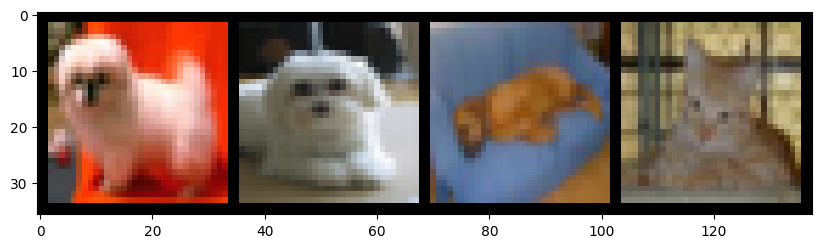

In [61]:
# 랜덤으로 4개의 이미지를 보여주는 함수
def imshow(img):
    plt.figure(figsize=(10, 5))                     # 차트사이즈 조정
    npimg = img.numpy()                             # Tensor를 numpy array로 변환
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #plt.show()

# 훈련 데이터에서 일부 이미지 가져오기
dataiter = iter(training_loader)

# training_loader는 이미지에서 1회 itter당 batch_size 만큼의 이미지를 내보낸다.
# 따라서 batch_size=4 이기 때문에 images, labels 에는 4개의 이미지가 할당됨
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# 레이블 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

torch.Size([3, 32, 32])


Text(0.5, 1.0, 'dog')

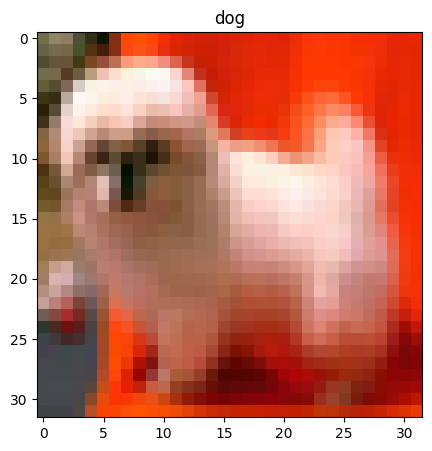

In [62]:
# 1번째 이미지 갖고오기
print(images[0].shape)
imshow(images[0])
plt.title(classes[labels[0]])

* 이미지 데이터는 너비(W),높이(H),채널(C)인 숫자로 표현 할 수 있다.
* 또한 이미지는 RGB 3가지 색깔의 조합으로 모든 색상을 표현할 수 있는데, 이 RGB색상값을 채널(C) 이라고함.
* 즉 pytorch는 이미지를 로드해 `채널(C), 너비(W),높이(H)` 인 3차원의 텐서로 이미지 데이터를 표현하는 것을 확인할 수 있다.

```python
# 채널(C):3, 너비(W):32, 높이(H):32
torch.Size([3, 32, 32])
```

* 위 그림에서 작은 사각형 격자가 보일텐데, 이 1칸을 픽셀이라는 단위이다. 즉 , 32x32라는 것은 이 픽셀이 가로로 32개 세로로 32개로 총 1024개의 픽셀로 구성되었다는 뜻이다.
* 이를 테서 구조로 살펴보면 아래 각각 텐서의 원소는 1개의 픽셀을 의미하는 것과 동일하다.
* 이 때 픽셀이 일종의 그릇이라면, 이 픽셀에 들어가는 값은 RGB채널의 값을 의미한다.
* 2차원 평면으로 텐서를 표현하다 보니, 3개의 32x32가 세로로 쌓여있는 형태처럼 보이지만, 3차원 텐서이기 때문에 사실은 R채널 32x32, G채널 32x32, B채널 32x32 3개의 판이 겹쳐 있는 구조이다.
* 즉, 첫번째 값인 0.4431는 1픽셀에 들어가는 RGB값 중 R채널의 값이 0.4431임을 의미한다.(자세한 설명은 github의 PPT 참고)

```python
# 그림은 랜덤으로 뽑기 때문에 재실행시 아래 값과 다를 수 있음.

       [[[0.4431, 0.5725, 0.5608,  ..., 0.8980, 0.8980, 0.9020], # R채널 32x32
         [0.4000, 0.4706, 0.4667,  ..., 0.8902, 0.8980, 0.8941],
         [0.3098, 0.3961, 0.4039,  ..., 0.8980, 0.9059, 0.8980],
         ...,
         [0.2706, 0.2745, 0.2784,  ..., 0.5804, 0.6078, 0.6353],
         [0.2667, 0.2667, 0.2745,  ..., 0.6039, 0.6745, 0.7412],
         [0.2471, 0.2510, 0.2588,  ..., 0.8314, 0.8706, 0.9216]],

        [[0.4314, 0.5176, 0.4863,  ..., 0.1529, 0.1529, 0.1569], # G채널 32x32
         [0.3843, 0.4157, 0.4039,  ..., 0.1490, 0.1569, 0.1529],
         [0.2941, 0.3373, 0.3255,  ..., 0.1529, 0.1647, 0.1529],
         ...,
         [0.2863, 0.2902, 0.2902,  ..., 0.0353, 0.0353, 0.0431],
         [0.2824, 0.2824, 0.2784,  ..., 0.0431, 0.0549, 0.0902],
         [0.2627, 0.2667, 0.2627,  ..., 0.1647, 0.2000, 0.2314]],

        [[0.2941, 0.3961, 0.3843,  ..., 0.0196, 0.0118, 0.0157], # B채널 32x32
         [0.2863, 0.3059, 0.2902,  ..., 0.0196, 0.0157, 0.0118],
         [0.1922, 0.2314, 0.2118,  ..., 0.0235, 0.0196, 0.0118],
         ...,
         [0.2980, 0.3020, 0.3020,  ..., 0.0353, 0.0235, 0.0196],
         [0.2941, 0.2941, 0.2980,  ..., 0.0196, 0.0039, 0.0039],
         [0.2745, 0.2784, 0.2824,  ..., 0.0235, 0.0157, 0.0157]]]
```

In [64]:
images[0]

tensor([[[0.4431, 0.5725, 0.5608,  ..., 0.8980, 0.8980, 0.9020],
         [0.4000, 0.4706, 0.4667,  ..., 0.8902, 0.8980, 0.8941],
         [0.3098, 0.3961, 0.4039,  ..., 0.8980, 0.9059, 0.8980],
         ...,
         [0.2706, 0.2745, 0.2784,  ..., 0.5804, 0.6078, 0.6353],
         [0.2667, 0.2667, 0.2745,  ..., 0.6039, 0.6745, 0.7412],
         [0.2471, 0.2510, 0.2588,  ..., 0.8314, 0.8706, 0.9216]],

        [[0.4314, 0.5176, 0.4863,  ..., 0.1529, 0.1529, 0.1569],
         [0.3843, 0.4157, 0.4039,  ..., 0.1490, 0.1569, 0.1529],
         [0.2941, 0.3373, 0.3255,  ..., 0.1529, 0.1647, 0.1529],
         ...,
         [0.2863, 0.2902, 0.2902,  ..., 0.0353, 0.0353, 0.0431],
         [0.2824, 0.2824, 0.2784,  ..., 0.0431, 0.0549, 0.0902],
         [0.2627, 0.2667, 0.2627,  ..., 0.1647, 0.2000, 0.2314]],

        [[0.2941, 0.3961, 0.3843,  ..., 0.0196, 0.0118, 0.0157],
         [0.2863, 0.3059, 0.2902,  ..., 0.0196, 0.0157, 0.0118],
         [0.1922, 0.2314, 0.2118,  ..., 0.0235, 0.0196, 0.

* 따라서 아래처럼 각 RGB에 해당하는 32x32의 판값을 의도적으로 수정할 경우 각 채널에 해당하는 색만 남게되는것을 알 수 있다.

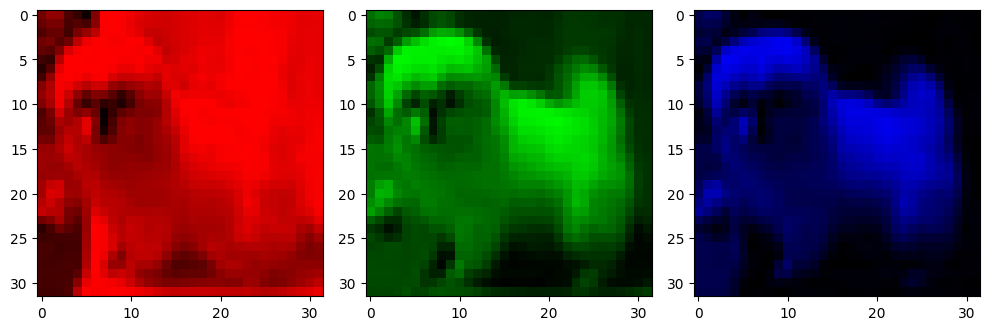

In [68]:
# 각 채널을 분리하고, 나머지 채널을 0으로 설정
R_channel = images[0].clone()                    # img텐서 복사
R_channel[1, :, :] = 0  # G 채널을 0으로
R_channel[2, :, :] = 0  # B 채널을 0으로
R_channel = R_channel.permute(1, 2, 0)     # C, H, W 순서를 H, W, C로 변경 (시각화 때문에)

G_channel = images[0].clone()                    # img텐서 복사
G_channel[0, :, :] = 0  # R 채널을 0으로
G_channel[2, :, :] = 0  # B 채널을 0으로
G_channel = G_channel.permute(1, 2, 0)     # C, H, W 순서를 H, W, C로 변경 (시각화 때문에)

B_channel = images[0].clone()                    # img텐서 복사
B_channel[0, :, :] = 0  # R 채널을 0으로
B_channel[1, :, :] = 0  # G 채널을 0으로
B_channel = B_channel.permute(1, 2, 0)     # C, H, W 순서를 H, W, C로 변경 (시각화 때문에)

# 이미지 시각화
fig, axs = plt.subplots(1, 3, figsize=(10, 5))  # 축 제거 3개의 사진을 표시할 수 있도록 subplot생성

axs[0].imshow(R_channel)  # 첫 번째 서브플롯에 R_channel 시각화
axs[1].imshow(G_channel)  # 두 번째 서브플롯에 G_channel 시각화
axs[2].imshow(B_channel)  # 세 번째 서브플롯에 B_channel 시각화

# 서브플롯의 레이아웃 조정
plt.tight_layout()
plt.show()

* 이미지를 형태로 가시적으로 표현하면 사진과 같지만, PyTorch,Tensorflow와 같은 딥러닝 프레임워크는 텐서(Tensor)라는 다차원 Array 숫자형태로 처리하고 계산함.
* 이미지를 텐서라는 다차원 Array로 표현이 가능하다는 것은 이미지를 좌표 평면 상에 한 점으로 표시가 가능하다는 것을 의미하며
* 좌표 평면 상에 한 점으로 표시가 가능한 것(=벡터표현=임베딩)은 거리의 개념을 통해 이미지 분류 부터 의미론적인 모든 연산이 가능함을 의미한다.